In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')
from pathlib import Path
base = Path('/Disdata')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DMWH/faults.csv')

In [9]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [8]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

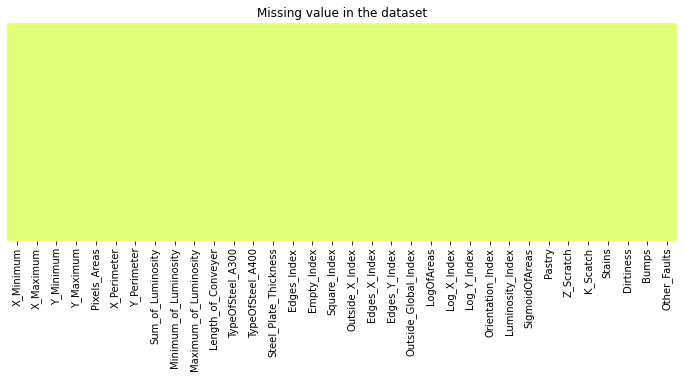

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='Wistia',yticklabels=False)
plt.title('Missing value in the dataset');

In [11]:
#these are kind of faults
df.iloc[:,27:34]

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1936,0,0,0,0,0,0,1
1937,0,0,0,0,0,0,1
1938,0,0,0,0,0,0,1
1939,0,0,0,0,0,0,1


In [12]:
y=df.iloc[:,27:34];
X=df.iloc[:,0:27];
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range =(0,1))

X_std = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
print(X_std.shape)

(1941, 27)


In [13]:
targets = df.iloc[:, 27:]


In [14]:
#insted of 7 diff columns we added an single column
df.drop(targets.columns, axis=1, inplace=True) 
df['Target'] = targets.idxmax(1) 
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [1]:
target_counts= df['Target'].value_counts()

fig ,ax = plt.subplots(1,2, figsize=(15,7))
target_counts_barplot = sns.barplot(x = target_counts.index,y = target_counts.values, ax = ax[0])
target_counts_barplot.set_ylabel('Number of classes in the dataset')
#colors = ['#8d99ae','#ffe066', '#f77f00','#348aa7','#bce784','#ffcc99',  '#f25f5c']
target_counts.plot.pie(autopct="%1.1f%%", ax=ax[1])

In [16]:
#catogerial values to the bumeric value conversion
df['Target'] = pd.Categorical(df['Target'])
df['Target_Code'] = df.Target.cat.codes

In [17]:
y=df.iloc[:,27];

In [18]:
df.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Code
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251,-0.155906
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736,-0.179694
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257,-0.139695
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284,-0.139694
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947,-0.076184
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605,-0.056565
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772,-0.018765
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248,-0.086180
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797,0.086158
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651,-0.099244


In [19]:
#see the outliers
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Code
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,2.569809
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,1.762407
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,2.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,3.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,3.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,6.000000


In [20]:
from sklearn.cluster import DBSCAN
from collections import Counter
eps_r = 0.1
while eps_r < 10:
    dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std) 
    
    if Counter(dbscan_model.labels_)[-1] < 0.1*len(X_std):
        print('The neighbourhood distance considered for removal of less than 10% outliers is: {}'.format(eps_r))
        break
        
    eps_r = eps_r + 0.1

The neighbourhood distance considered for removal of less than 10% outliers is: 0.6


In [21]:
dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X_std)

In [22]:
outliers = X_std[dbscan_model.labels_ == -1]
outliers.shape

(144, 27)

so here 144 records with outlinears so lets drop them.

In [23]:
X_std.drop(outliers.index, axis=0, inplace=True)
y.drop(outliers.index, axis=0, inplace=True)

In [24]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size = 0.90, random_state = 15)

In [25]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, y_train)

y_pred_LogReg = LogReg.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_LogReg))
print(confusion_matrix(y_test, y_pred_LogReg))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_LogReg,y_test))

              precision    recall  f1-score   support

       Bumps       0.62      0.59      0.60        44
   Dirtiness       1.00      1.00      1.00         3
    K_Scatch       0.98      1.00      0.99        40
Other_Faults       0.62      0.77      0.69        47
      Pastry       0.71      0.42      0.53        12
      Stains       1.00      0.77      0.87        13
   Z_Scratch       0.74      0.67      0.70        21

    accuracy                           0.74       180
   macro avg       0.81      0.74      0.77       180
weighted avg       0.75      0.74      0.74       180

[[26  0  0 14  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 9  0  0 36  1  0  1]
 [ 2  0  0  4  5  0  1]
 [ 1  0  0  2  0 10  0]
 [ 4  0  1  2  0  0 14]]
accuracy is 0.7444444444444445


[[26  0  0 14  1  0  3]
 [ 0  3  0  0  0  0  0]
 [ 0  0 40  0  0  0  0]
 [ 9  0  0 36  1  0  1]
 [ 2  0  0  4  5  0  1]
 [ 1  0  0  2  0 10  0]
 [ 4  0  1  2  0  0 14]]


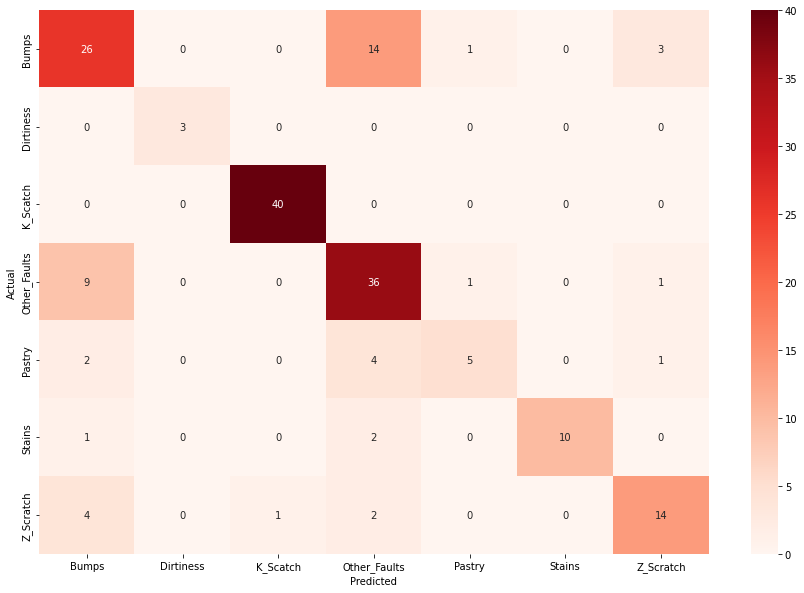

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_LogReg)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

y_pred_DTC = DTC.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_DTC))
print(confusion_matrix(y_test, y_pred_DTC))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DTC,y_test))

              precision    recall  f1-score   support

       Bumps       0.67      0.66      0.67        44
   Dirtiness       1.00      0.67      0.80         3
    K_Scatch       0.93      1.00      0.96        40
Other_Faults       0.68      0.64      0.66        47
      Pastry       0.50      0.58      0.54        12
      Stains       0.85      0.85      0.85        13
   Z_Scratch       0.90      0.90      0.90        21

    accuracy                           0.77       180
   macro avg       0.79      0.76      0.77       180
weighted avg       0.77      0.77      0.77       180

[[29  0  0  9  3  1  2]
 [ 0  2  0  0  1  0  0]
 [ 0  0 40  0  0  0  0]
 [11  0  2 30  3  1  0]
 [ 1  0  0  4  7  0  0]
 [ 1  0  0  1  0 11  0]
 [ 1  0  1  0  0  0 19]]
accuracy is 0.7666666666666667


[[29  0  0  9  3  1  2]
 [ 0  2  0  0  1  0  0]
 [ 0  0 40  0  0  0  0]
 [11  0  2 30  3  1  0]
 [ 1  0  0  4  7  0  0]
 [ 1  0  0  1  0 11  0]
 [ 1  0  1  0  0  0 19]]


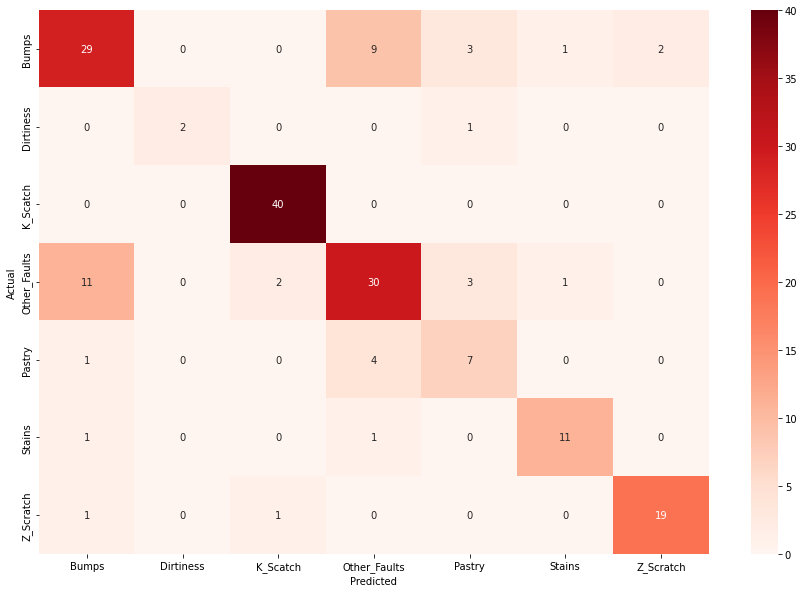

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_DTC)

print(cm)
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sns.heatmap(df_cm,annot=True,cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


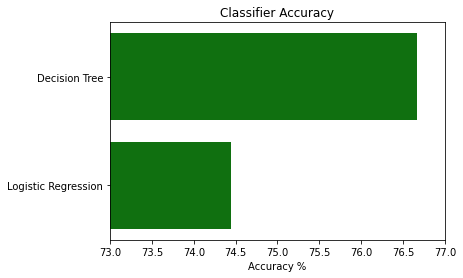

In [31]:
acc=[accuracy_score(y_pred_DTC,y_test),accuracy_score(y_pred_LogReg,y_test)]
models = ['Decision Tree','Logistic Regression']
acc_ = np.array(acc)*100
sns.barplot(acc_, models, color="g")
plt.xlim([73,77])
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()